# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [388]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [389]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [390]:
#start
#analysis

In [391]:
#making a copy to preserve original
df = attrition_data 

In [392]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,1,6,3,3,2,2,2,2,4


In [393]:
#df.info()

In [394]:
#check for null values
print('Number of null values: {}'.format(df.isnull().sum().sum()))

Number of null values: 0


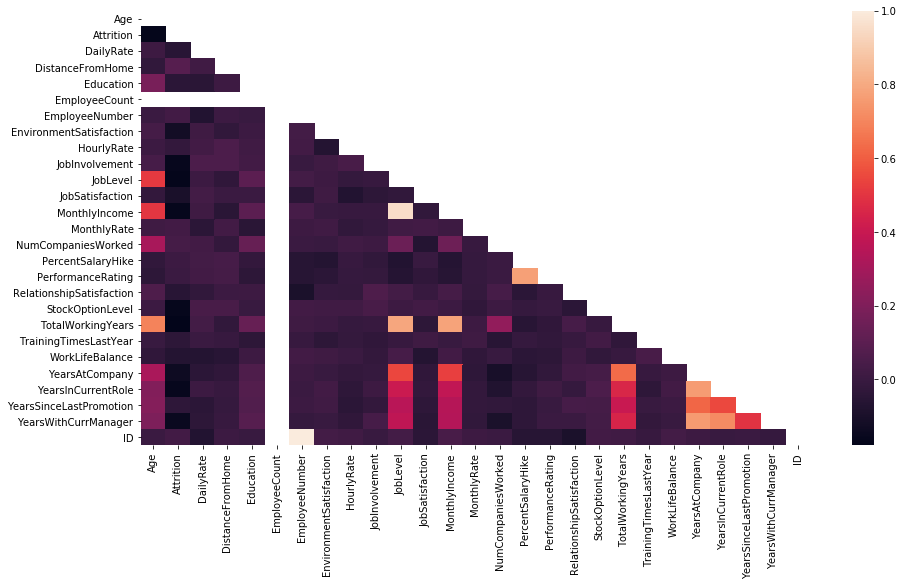

In [395]:
dfNum = df.select_dtypes(include='number')
mask = np.zeros_like(dfNum.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,8))
sns.heatmap(dfNum.corr(),mask=mask)

In [396]:
att_corr = pd.DataFrame(dfNum.corr()['Attrition'])
#att_corr

In [397]:
att_corr.drop('Attrition',inplace=True)

In [398]:
index = list(att_corr.index)

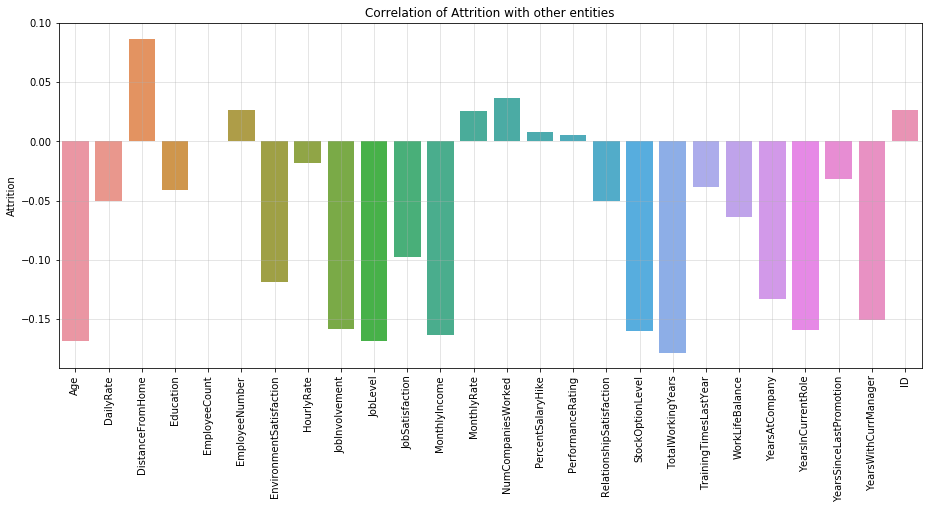

In [399]:
plt.figure(figsize=(13,7))
sns.barplot(x=index,y='Attrition',data=att_corr)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Correlation of Attrition with other entities")
plt.grid(alpha=0.4)

In [400]:
print("Non-numerical Columns = {}".format(df.shape[1]-dfNum.shape[1]))
print("Duplicated values: {}".format(df.duplicated().sum()))

Non-numerical Columns = 7
Duplicated values: 0


## Dropping columns which are of lesser use

In [401]:
no_use = ['ID','EmployeeCount']
df.drop(no_use,axis=1,inplace=True)

In [402]:
df['Attrition'].value_counts()

0    856
1    172
Name: Attrition, dtype: int64

In [403]:
#sns.pairplot(df)

In [404]:
df0 = df[df['Attrition']==0]
df1 = df[df['Attrition']==1]

## Generating Samples as the Data is BIASED

In [405]:
folds = int(round(df['Attrition'].value_counts()[0]/df['Attrition'].value_counts()[1]))
folds

5

In [406]:
def genSample(data,folds,div):
    data = shuffle(data)
    samples = []
    i = 0
    for j in range(folds+1):
        if(j==folds):
            sam = data[i:]
            samples.append(sam)
            break
        sam = data[i:(j+1)*div]
        samples.append(sam)
        i = (j+1)* div
    return samples
        

In [407]:
samples = genSample(df0,folds,df['Attrition'].value_counts()[1])

In [408]:
s1 = pd.concat([df1,samples[0]])
s2 = pd.concat([df1,samples[1]])
s3 = pd.concat([df1,samples[2]])
s4 = pd.concat([df1,samples[3]])
s5 = pd.concat([df1,samples[4]])
s6 = pd.concat([df1,samples[5]])
s1 = shuffle(s1)
s2 = shuffle(s2)
s3 = shuffle(s3)
s4 = shuffle(s4)
s5 = shuffle(s5)
s6 = shuffle(s6)

In [409]:
dfStr = df.select_dtypes(exclude='number')
# dfStr.shape
dfStr_col = dfStr.columns
dfStr

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1023,Travel_Rarely,Research & Development,Life Sciences,Female,Research Scientist,Married,No
1024,Travel_Rarely,Research & Development,Medical,Female,Research Director,Married,No
1025,Travel_Rarely,Sales,Medical,Female,Sales Executive,Married,Yes
1026,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Married,No


# For Sample1

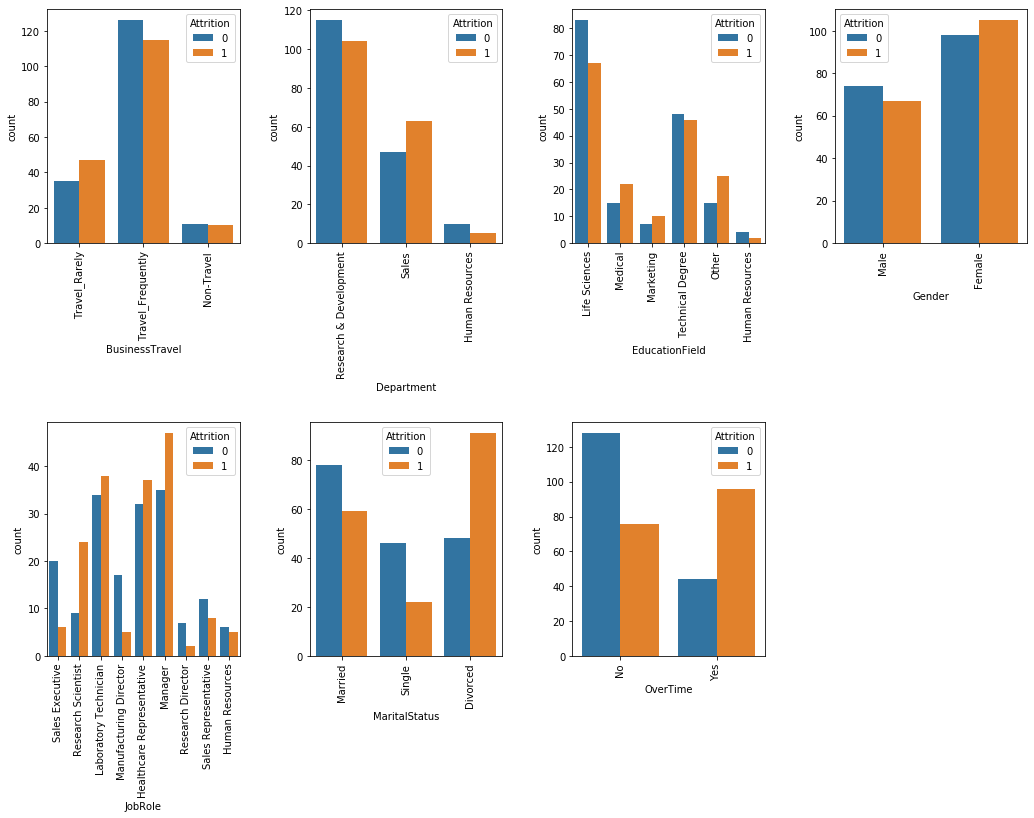

In [410]:
f,ax = plt.subplots(2,4,figsize=(15,12))

n = 0
for i in range(2):
    for j in range(4):
        sns.countplot(x=dfStr_col[n],hue='Attrition',data=s1,ax=ax[i][j])
        ax[i][j].set_xticklabels(labels=df[dfStr_col[n]].value_counts().index.tolist(),rotation=90)
        n+=1
        if(n==7):
            break
f.delaxes(ax[1][3])
plt.tight_layout(pad=3)
plt.show() 


# For Sample2

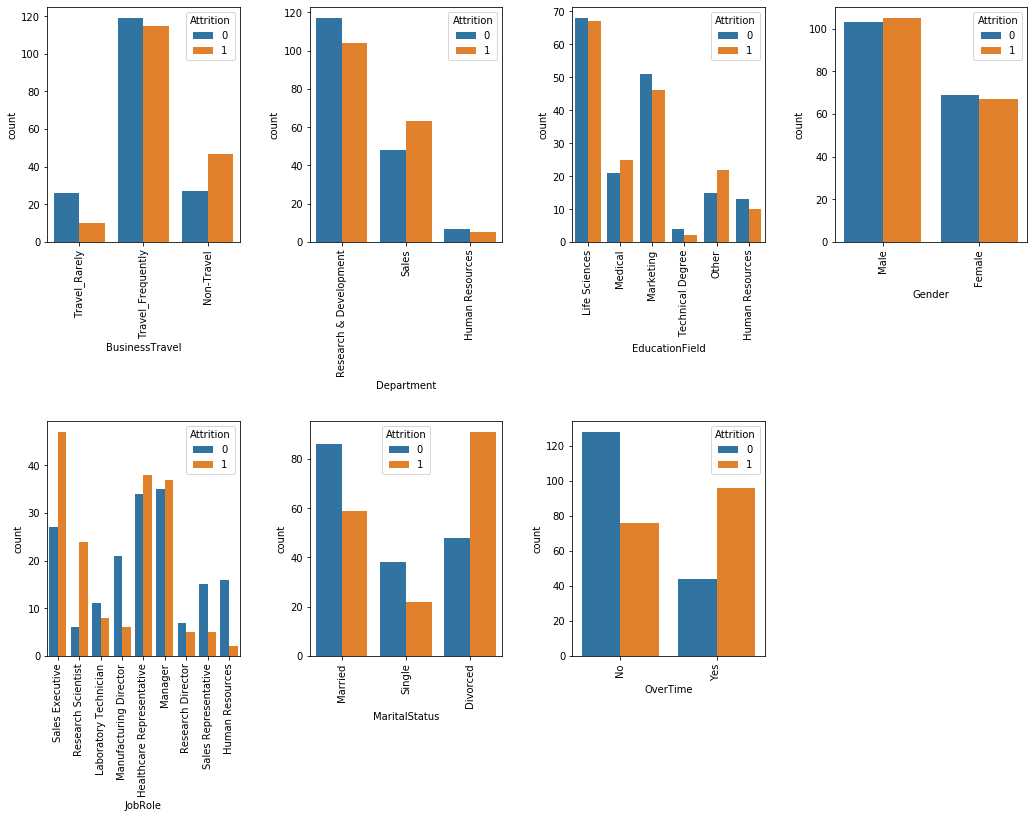

In [411]:
f,ax = plt.subplots(2,4,figsize=(15,12))

n = 0
for i in range(2):
    for j in range(4):
        sns.countplot(x=dfStr_col[n],hue='Attrition',data=s2,ax=ax[i][j])
        ax[i][j].set_xticklabels(labels=df[dfStr_col[n]].value_counts().index.tolist(),rotation=90)
        n+=1
        if(n==7):
            break
f.delaxes(ax[1][3])
plt.tight_layout(pad=3)
plt.show() 

In [412]:
dfNum1 = dfNum
dfNum1 = dfNum1.drop(['Attrition','EmployeeCount','ID','EmployeeNumber'],axis=1)
dfNum1.shape

(1028, 23)

In [413]:
target = dfNum['Attrition']

In [414]:
features = dfNum1[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]
# features.shape

In [415]:
x_train,x_test,y_train,y_test = train_test_split(dfNum1,target,test_size=0.20)

In [416]:
clf = SelectKBest()

In [417]:
X_train_chi2 = clf.fit_transform(x_train,y_train)
print(clf.get_support())
numColSel = [] 
for i,item in enumerate(clf.get_support()):
    if(item):
        numColSel.append(features.columns[i])

[ True False  True False  True False  True  True False  True False False
 False False False  True  True False False False  True False  True]


In [418]:
numColSel

['Age',
 'DistanceFromHome',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'MonthlyIncome',
 'StockOptionLevel',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

## Random Forest with all the Numerical Columns

In [419]:
train_scores = []
test_scores = []
for i in [1, 2, 3, 4, 5, 10, 20, 50,100]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(x_train, y_train) # print(rfc)

    train_predictions = rfc.predict(x_train)
    test_predictions = rfc.predict(x_test)

    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))
print("Maximum training score: {}".format(max(train_scores)))
print("Maximum testing score: {}".format(max(test_scores)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training scores were: [0.91, 0.92, 0.96, 0.95, 0.97, 0.98, 0.99, 1.0, 1.0]
The testing scores were: [0.74, 0.84, 0.8, 0.82, 0.8, 0.82, 0.82, 0.83, 0.83]
Maximum training score: 1.0
Maximum testing score: 0.84


## Random Forest with a few selected numerical columns

In [420]:
features1 = dfNum1[numColSel]
target1 = target


In [421]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(features1,target1,test_size=0.20)

In [422]:
train_scores1 = []
test_scores1 = []
for i in [1, 2, 3, 4, 5, 10, 20, 50,100]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(x_train1, y_train1) # print(rfc)

    train_predictions = rfc.predict(x_train1)
    test_predictions = rfc.predict(x_test1)

    train_scores1.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores1.append(round(accuracy_score(y_test, test_predictions), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores1))
print("The testing scores were: {}".format(test_scores1))
print("Maximum training score: {}".format(max(train_scores1)))
print("Maximum testing score: {}".format(max(test_scores1)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training scores were: [0.72, 0.77, 0.74, 0.76, 0.74, 0.74, 0.74, 0.73, 0.73]
The testing scores were: [0.71, 0.78, 0.77, 0.8, 0.77, 0.78, 0.79, 0.79, 0.79]
Maximum training score: 0.77
Maximum testing score: 0.8


## XGB Classifier on Numerical columns

In [423]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(x_train, y_train)

<IPython.core.display.Javascript object>

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [424]:
predictions = xgb_clf.predict(x_train)
accuracy = accuracy_score(y_train, predictions)
print('Training Accuracy')
print(np.round(accuracy*100, 2), '%')

Training Accuracy
91.0 %


In [425]:
predictions = xgb_clf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print('Testing Accuracy')
print(np.round(accuracy*100, 2), '%')

Testing Accuracy
83.98 %


In [441]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[160  10]
 [ 33   3]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       170
           1       0.23      0.08      0.12        36

    accuracy                           0.79       206
   macro avg       0.53      0.51      0.50       206
weighted avg       0.72      0.79      0.75       206



## XGB Classifier using selected Numerical columns 

In [426]:
xgb_clf.fit(x_train1, y_train1)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [427]:
predictions = xgb_clf.predict(x_train1)
accuracy = accuracy_score(y_train1, predictions)
print('Training Accuracy')
print(np.round(accuracy*100, 2), '%')

Training Accuracy
89.42 %


In [428]:
predictions = xgb_clf.predict(x_test1)
accuracy = accuracy_score(y_test1, predictions)
print('Testing Accuracy')
print(np.round(accuracy*100, 2), '%')

Testing Accuracy
81.55 %


In [443]:
print(confusion_matrix(y_test1, predictions))
print("="*60)
print(classification_report(y_test1, predictions))

[[164   9]
 [ 29   4]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       173
           1       0.31      0.12      0.17        33

    accuracy                           0.82       206
   macro avg       0.58      0.53      0.54       206
weighted avg       0.76      0.82      0.78       206



## Using One-Hot-Encoding on Categorical Columns

In [429]:
dummies = pd.get_dummies(df[dfStr_col],drop_first=True)

In [430]:
dfNew = pd.concat([dfNum1,dummies],axis=1)

In [431]:
dfNew

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,56,1255,1,2,1,90,3,1,1,2066,...,0,0,0,0,1,0,0,1,0,0
1024,47,359,2,4,1,82,3,4,3,17169,...,0,0,0,1,0,0,0,1,0,0
1025,24,1476,4,1,4,42,3,2,3,4162,...,0,0,0,0,0,1,0,1,0,1
1026,32,601,7,5,4,97,3,2,4,9204,...,0,0,0,0,0,1,0,1,0,0


## Random Forest with all the Numerical Columns

In [432]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(dfNew,target,test_size=0.25)

In [433]:
train_scores2 = []
test_scores2 = []
for i in [1, 2, 3, 4, 5, 10, 20, 50,100]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(x_train2, y_train2) # print(rfc)

    train_predictions2 = rfc.predict(x_train2)
    test_predictions2 = rfc.predict(x_test2)

    train_scores2.append(round(accuracy_score(y_train2, train_predictions2), 2))
    test_scores2.append(round(accuracy_score(y_test2, test_predictions2), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores2))
print("The testing scores were: {}".format(test_scores2))
print("Maximum training score: {}".format(max(train_scores2)))
print("Maximum testing score: {}".format(max(test_scores2)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training scores were: [0.91, 0.92, 0.97, 0.95, 0.98, 0.98, 1.0, 1.0, 1.0]
The testing scores were: [0.73, 0.82, 0.82, 0.83, 0.82, 0.82, 0.83, 0.85, 0.85]
Maximum training score: 1.0
Maximum testing score: 0.85


In [434]:
dfNew1 = pd.concat([features1,dummies],axis=1)

## Random Forest with selected Numerical Columns

In [435]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(dfNew1,target,test_size=0.25)

In [436]:
train_scores3 = []
test_scores3 = []
for i in [1, 2, 3, 4, 5, 10, 20, 50,100]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(x_train3, y_train3) # print(rfc)

    train_predictions3 = rfc.predict(x_train3)
    test_predictions3 = rfc.predict(x_test3)

    train_scores3.append(round(accuracy_score(y_train2, train_predictions3), 2))
    test_scores3.append(round(accuracy_score(y_test2, test_predictions3), 2))

# Print the train and test scores.
print("The training scores were: {}".format(train_scores3))
print("The testing scores were: {}".format(test_scores3))
print("Maximum training score: {}".format(max(train_scores3)))
print("Maximum testing score: {}".format(max(test_scores3)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The training scores were: [0.72, 0.77, 0.73, 0.75, 0.73, 0.74, 0.73, 0.72, 0.72]
The testing scores were: [0.7, 0.8, 0.77, 0.8, 0.78, 0.79, 0.79, 0.79, 0.79]
Maximum training score: 0.77
Maximum testing score: 0.8
